In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

 Importing necessary libraries for data manipulation, visualization, and machine learning.
These libraries provide tools for data analysis, preprocessing, model training, and evaluation.

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data analysis

In [7]:
df.shape

(768, 9)

The dataset has 768 rows and 9 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Displaying the data types and non-null counts for each column.
To check for missing values and understand the data types.
Observation:
No missing values in the dataset.
Features are either int64 or float64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




Features like Glucose, BloodPressure, Insulin, and BMI have minimum values of 0, which means missing values are there.

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 No null values in the dataset.

next step Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

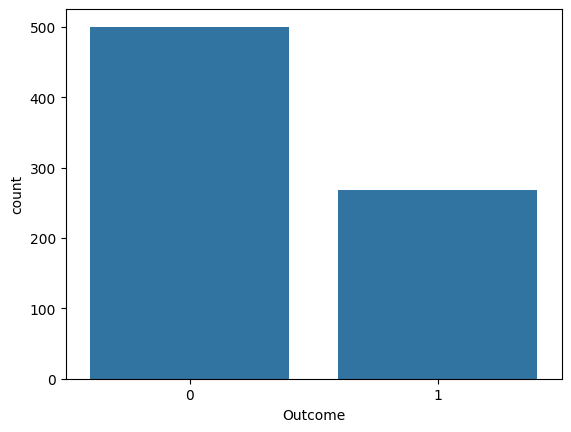

In [11]:
sns.countplot(x = 'Outcome',data = df)

Visualizing the distribution of the target variable (Outcome).

To check if the dataset is balanced.

Observation: The dataset is imbalanced, with more non-diabetic patients than diabetic patients.

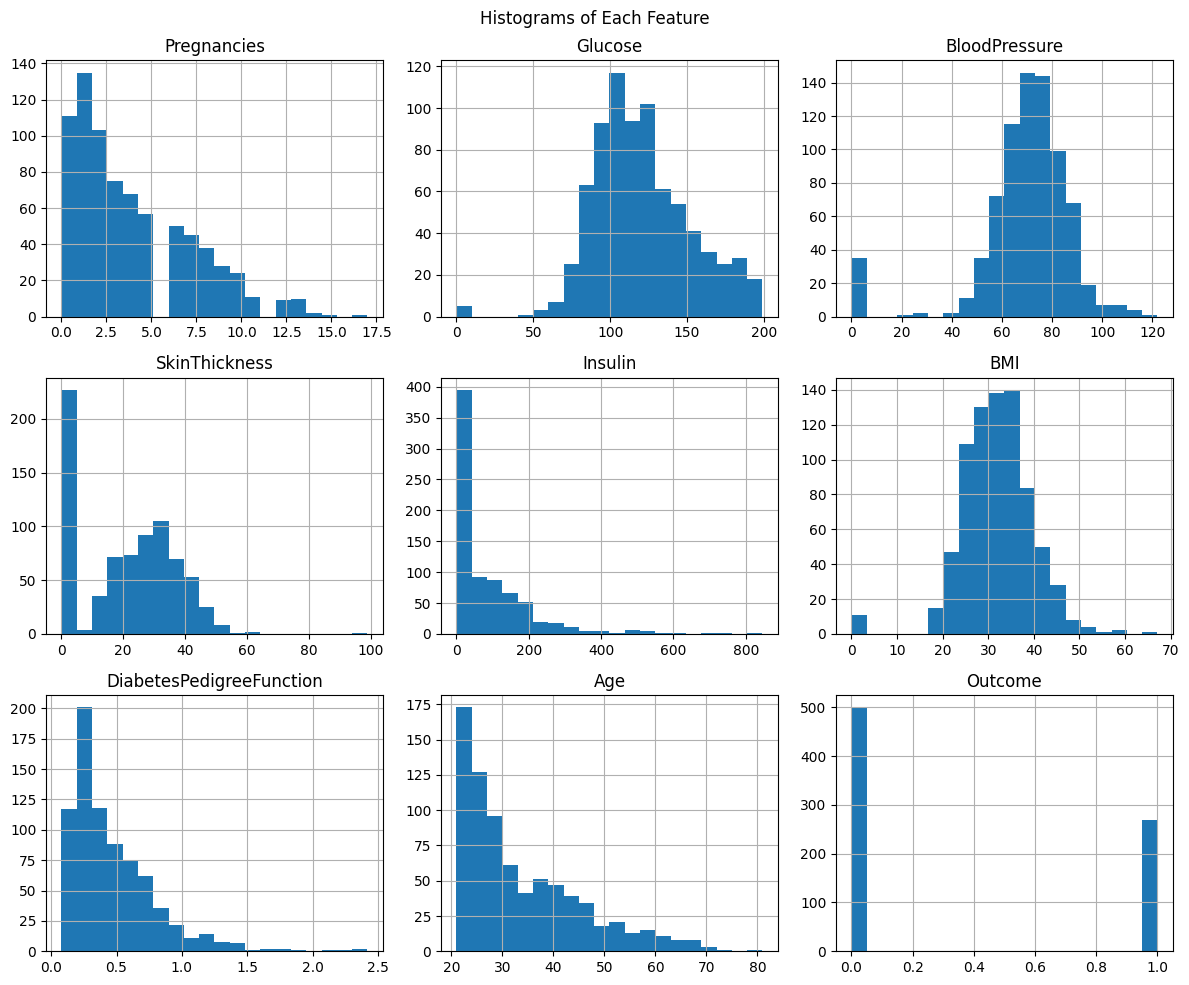

In [12]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Each Feature")
plt.tight_layout()
plt.show()



Features like Glucose, BMI, and Age showing some skewness.

Zero values in Glucose, BloodPressure, Insulin, and BMI are there.

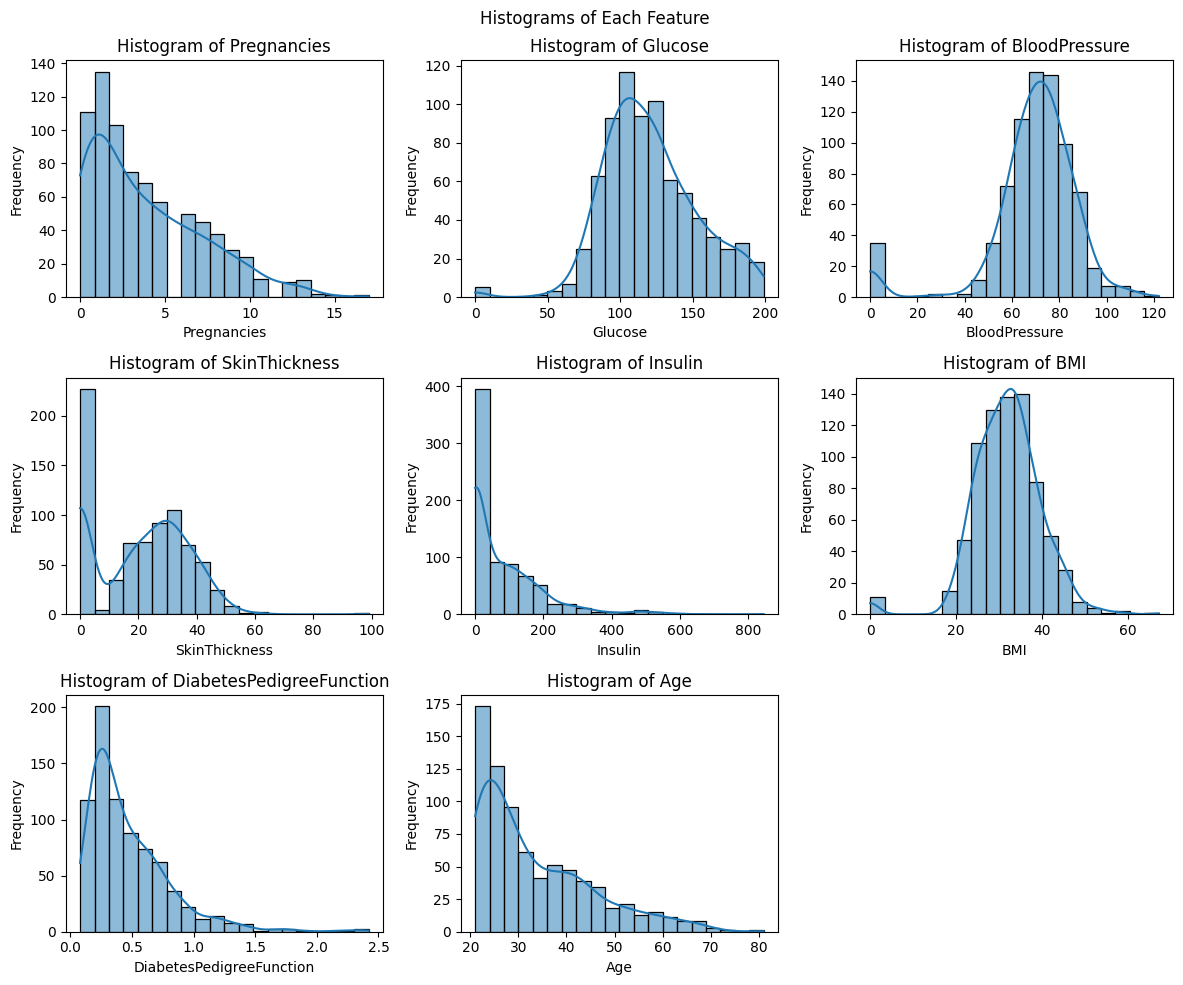

In [13]:
plt.figure(figsize=(12, 10))


for i, column in enumerate(df.columns[:-1]): 
    plt.subplot(3, 3, i + 1)  
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.suptitle("Histograms of Each Feature")
plt.tight_layout()
plt.show()

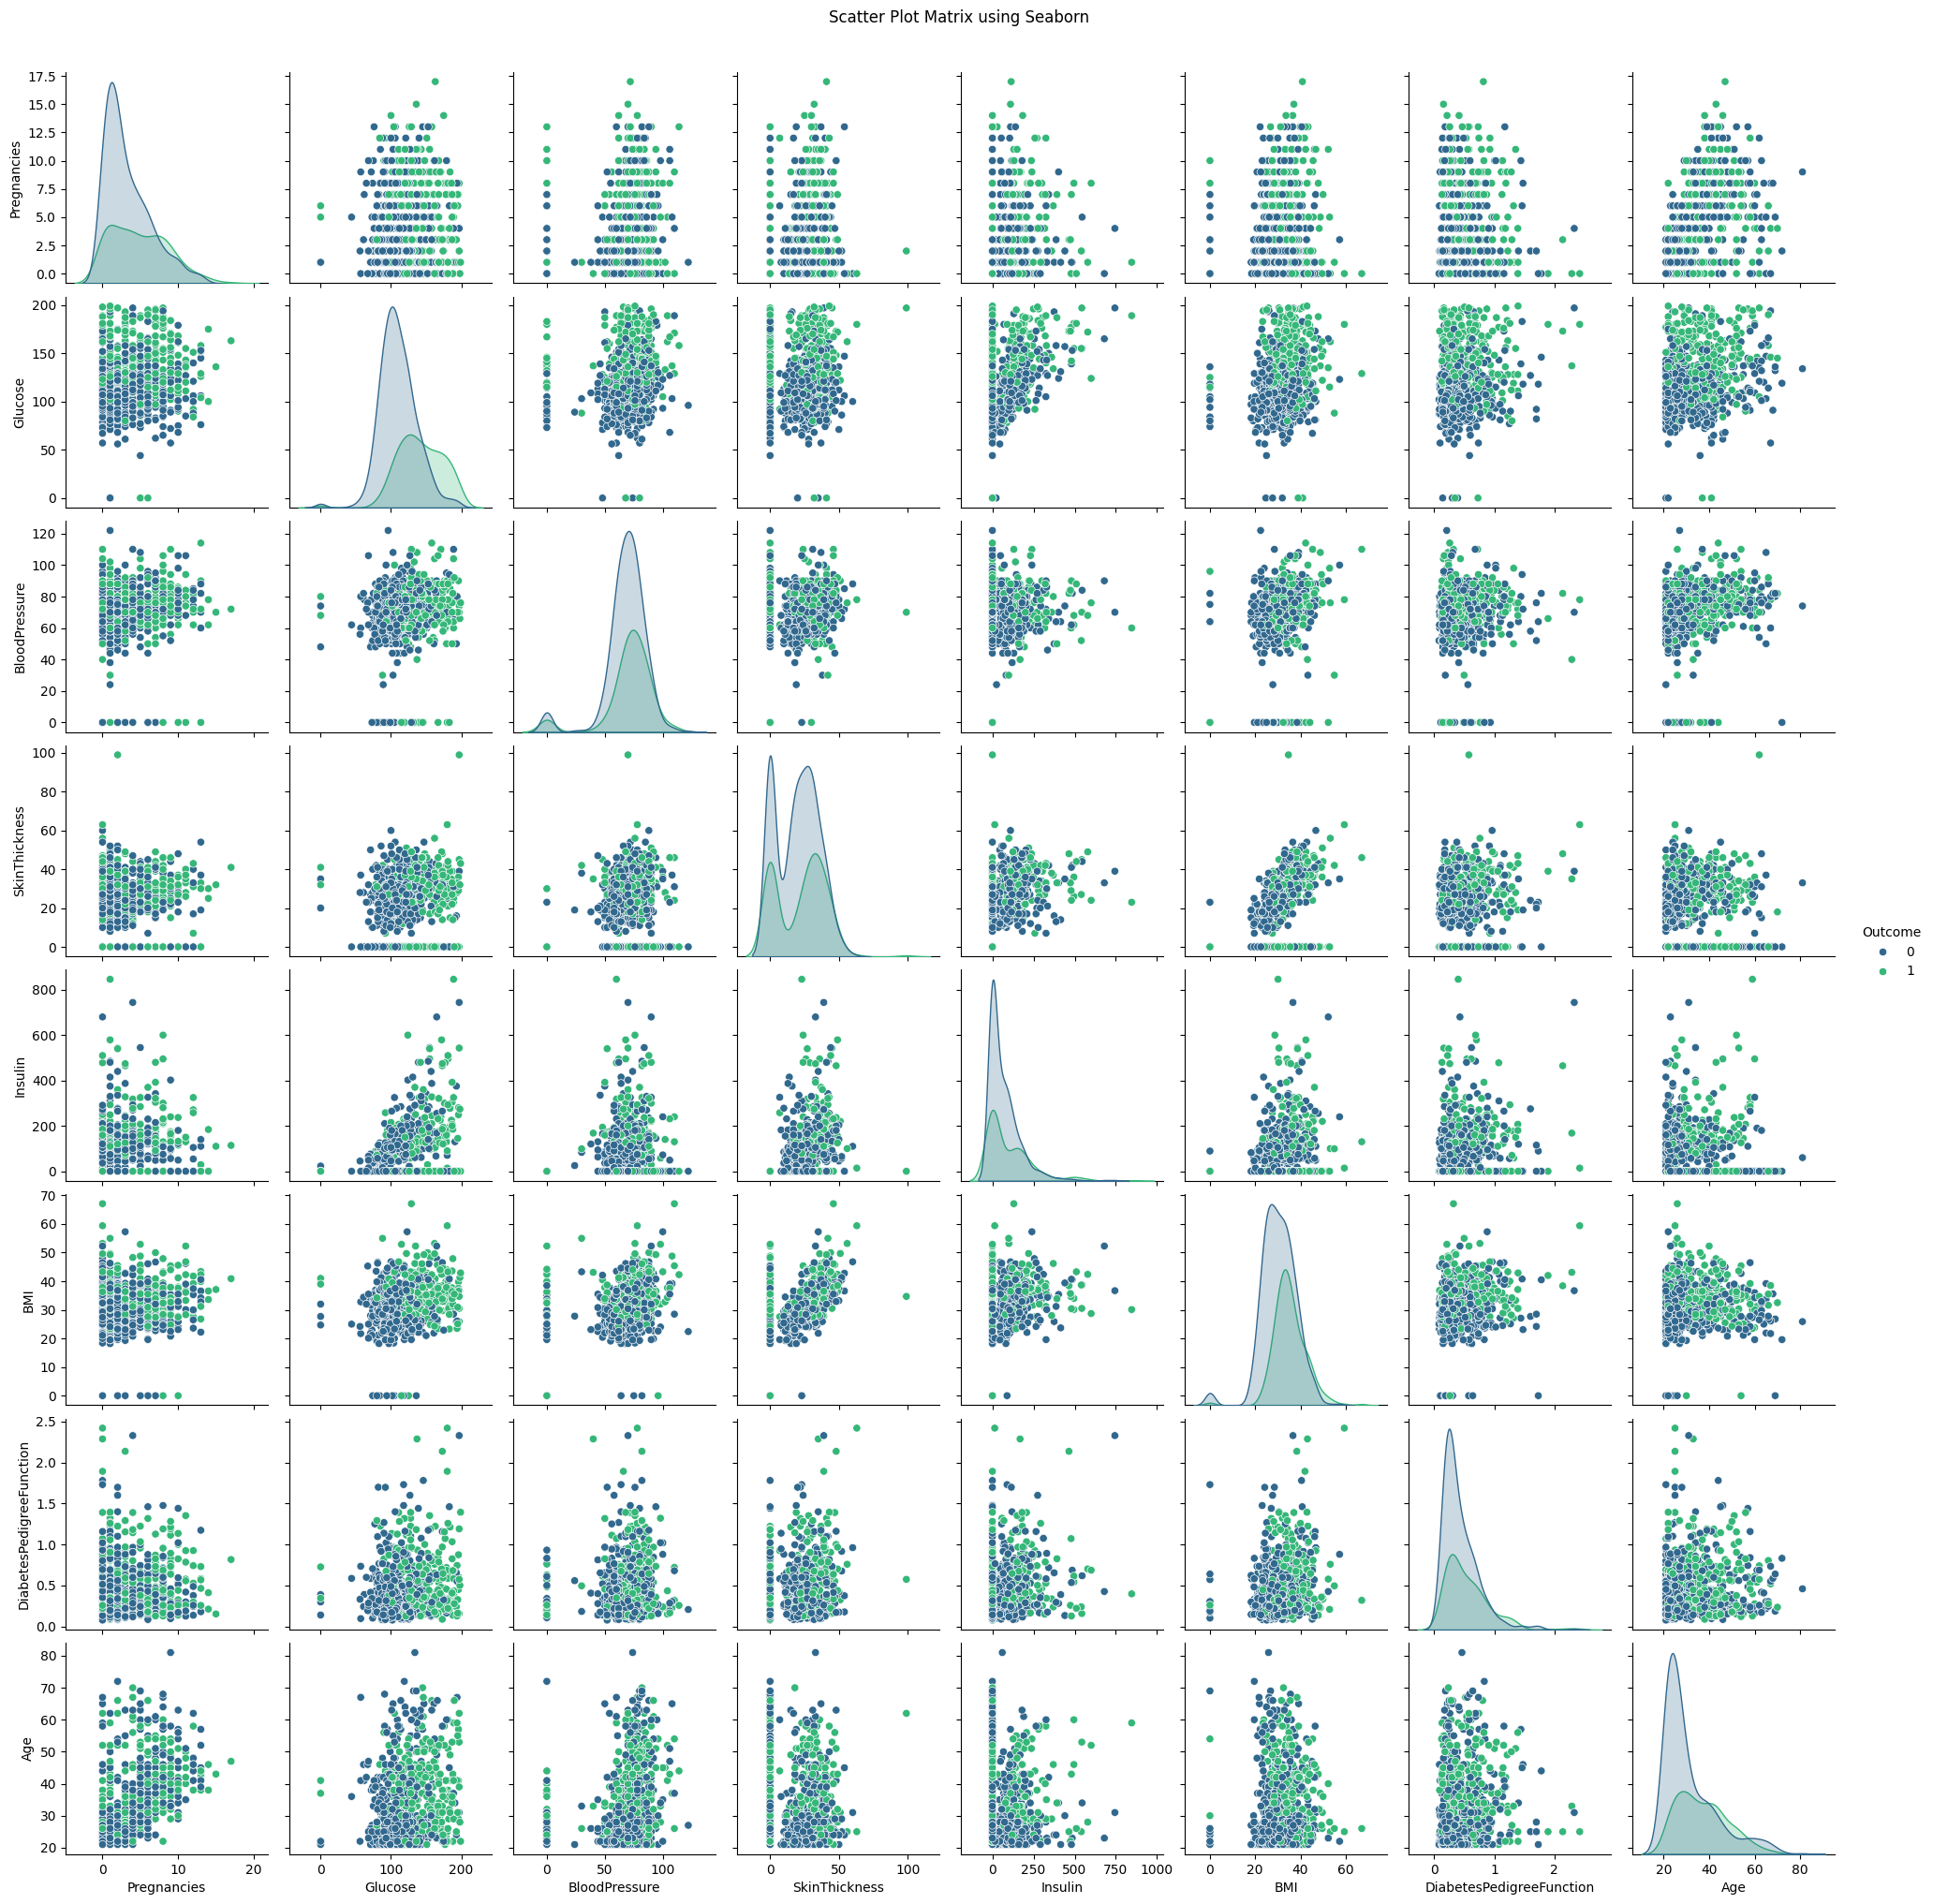

In [14]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='viridis', height=2.5)
plt.suptitle("Scatter Plot Matrix using Seaborn", y=1.02)
plt.show()

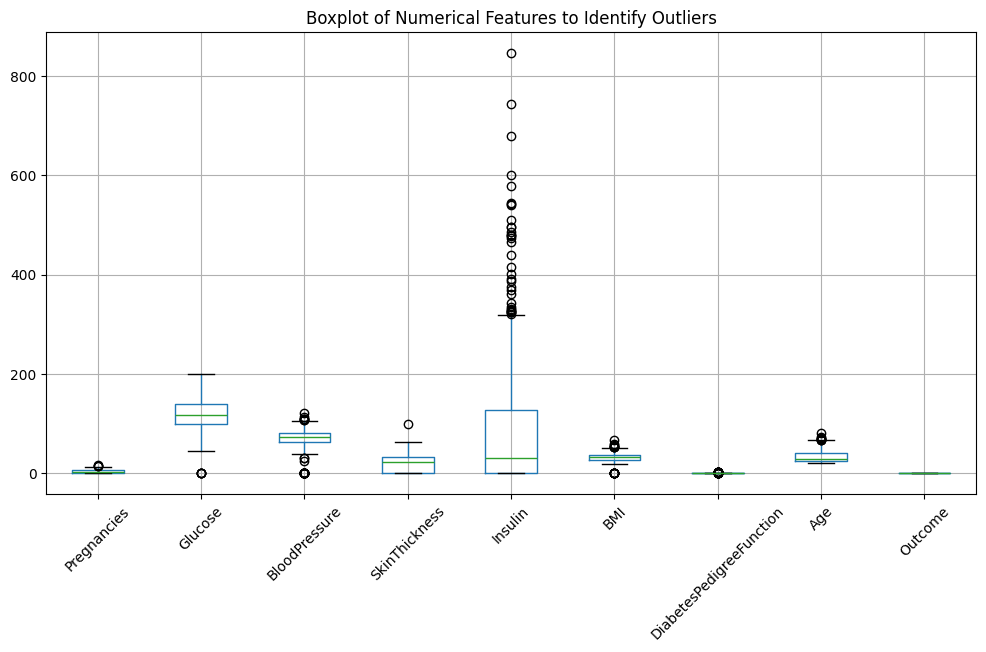

In [15]:

outliers = {}
for column in df.select_dtypes(include=[np.number]).columns:  # Only apply to numerical columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

plt.figure(figsize=(12, 6))
df.select_dtypes(include=[np.number]).boxplot(rot=45)
plt.title("Boxplot of Numerical Features to Identify Outliers")
plt.show()




Outliers are present in features of Pregnancies, Glucose, BloodPressure, Insulin, and BMI.




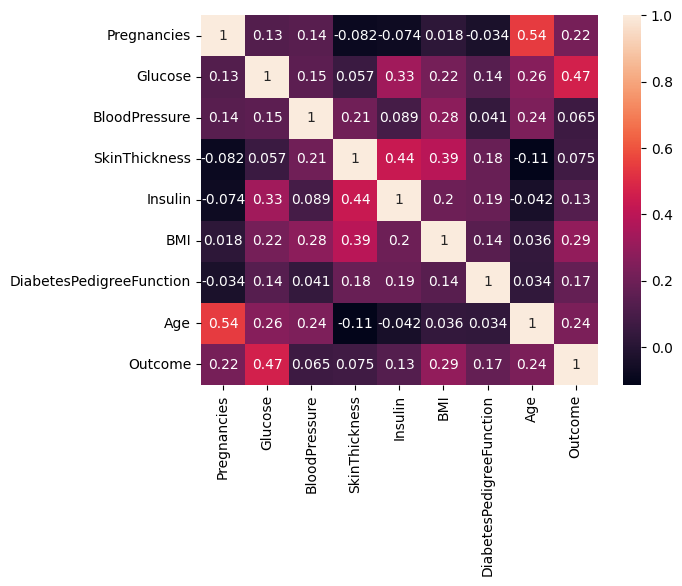

In [16]:
sns.heatmap(df.corr(), annot = True)
plt.show()



Glucose, BMI, and Age are positively correlated with Outcome
2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and Glucose,BMI,Age,Insulin. We can select these features to accept input from the user and predict the outcome.

Next Step Data Preprocessing

In [17]:
new_df = df

In [18]:
new_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
new_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = new_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

In [20]:
new_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



Missing values are now visible in Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

In [21]:

fill_values = {
    "Glucose": new_df["Glucose"].mean(),
    "BloodPressure": new_df["BloodPressure"].mean(),
    "SkinThickness": new_df["SkinThickness"].mean(),
    "Insulin": new_df["Insulin"].mean(),
    "BMI": new_df["BMI"].mean()
}

new_df.fillna(fill_values, inplace=True)


Missing values are now filled, and the dataset is ready for modeling.

In [22]:
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled = sc.fit_transform(new_df)

Features are now scaled, and the dataset is ready for modeling.

In [24]:
scaled = pd.DataFrame(scaled)

In [25]:
X = scaled.iloc[:, [1, 4, 5, 7]].values
Y = scaled.iloc[:, 8].values

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

splitting data into training and testing set

In [27]:
print("Training set dimensions:")
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("\nTesting set dimensions:")
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

Training set dimensions:
X_train: (614, 4)
Y_train: (614,)

Testing set dimensions:
X_test: (154, 4)
Y_test: (154,)


next step data training

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("\nKNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.7272727272727273


In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7402597402597403


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)


Linear Regression MSE: 0.17627453090311254
Linear Regression R²: 0.2322264876219985


Training KNN, Random Forest, and Linear Regression models.

Models are trained successfully.

Next step Evaluation

In [32]:

accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R square:", r2_lr)

KNN Accuracy: 0.7272727272727273
Random Forest Accuracy: 0.7402597402597403
Linear Regression MSE: 0.17627453090311254
Linear Regression R square: 0.2322264876219985


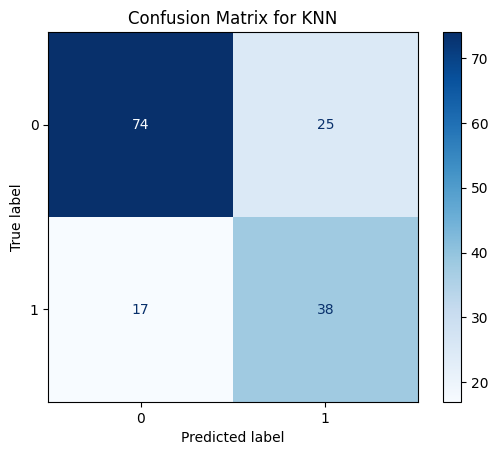

In [33]:
cm = confusion_matrix(Y_test, Y_pred_knn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

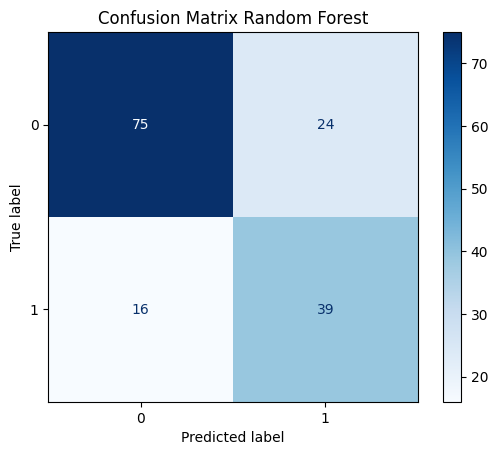

In [34]:
cm = confusion_matrix(Y_test, Y_pred_rf)

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.show()

In [35]:
from sklearn.metrics import f1_score

# Compute F1-score
f1_score_rf = f1_score(Y_test, Y_pred_rf)

print(f"F1-Score for Random Forest: {f1_score_rf:.4f}")


F1-Score for Random Forest: 0.6610


In [36]:
from sklearn.metrics import f1_score

# Compute F1-score
f1_score_knn = f1_score(Y_test, Y_pred_knn)

print(f"F1-Score for KNN: {f1_score_rf:.4f}")


F1-Score for KNN: 0.6610


In [37]:
scaler = MinMaxScaler()
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

features normalized


In [38]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


KNN Accuracy: 0.7532
RandomForest Accuracy: 0.7403
LogisticRegression Accuracy: 0.7792
SVM Accuracy: 0.7597


In [39]:

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Accuracy: 0.7769


Tuning hyperparameters for Random Forest using GridSearchCV.


In [40]:

import joblib
joblib.dump(best_model, 'diabetes_model.pkl')
print("Model saved as diabetes_model.pkl")


Model saved as diabetes_model.pkl


Saving the best-tuned model using joblib.

In [41]:


knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print(f"KNN Best Parameters: {knn_grid.best_params_}")
print(f"KNN Best Accuracy: {knn_grid.best_score_:.4f}")

KNN Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Best Accuracy: 0.7622


Tuning KNN hyperparameters (n_neighbors and weights).

To find the optimal configuration for KNN.


In [42]:

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

best_svm = svm_grid.best_estimator_
print(f"SVM Best Parameters: {svm_grid.best_params_}")
print(f"SVM Best Accuracy: {svm_grid.best_score_:.4f}")

SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVM Best Accuracy: 0.7736


Tuning SVM hyperparameters (C and kernel).

To improve SVM performance.


In [43]:

logreg_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

best_logreg = logreg_grid.best_estimator_
print(f"LogisticRegression Best Parameters: {logreg_grid.best_params_}")
print(f"LogisticRegression Best Accuracy: {logreg_grid.best_score_:.4f}")

LogisticRegression Best Parameters: {'C': 10, 'solver': 'lbfgs'}
LogisticRegression Best Accuracy: 0.7671


Tuning Logistic Regression hyperparameters (C and solver).

To optimize Logistic Regression performance.

In [44]:
# Save the best models
joblib.dump(best_knn, 'best_knn.pkl')
joblib.dump(best_svm, 'best_svm.pkl')
joblib.dump(best_logreg, 'best_logreg.pkl')
print("All best models saved successfully!")

All best models saved successfully!


In [47]:
import os
import pickle
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset


# Features and target
X = new_df.drop(columns=['Outcome'])
y = new_df['Outcome']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data (20% test set)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paths to saved models
model_paths = {
    "KNN": "best_knn.pkl",
    "Logistic Regression": "best_logreg.pkl",
    "SVM": "best_svm.pkl"
}

def load_model(file_path):
    """Loads a model, automatically detecting whether it's Pickle or Joblib."""
    if not os.path.exists(file_path):
        print(f"⚠️ Error: File '{file_path}' not found.")
        return None

    try:
        # Try loading with pickle
        with open(file_path, "rb") as f:
            return pickle.load(f)
    except (pickle.UnpicklingError, EOFError):
        try:
            # If pickle fails, try joblib
            return joblib.load(file_path)
        except Exception as e:
            print(f"❌ Error loading '{file_path}': {e}")
            return None

# Evaluate models
for model_name, model_path in model_paths.items():
    model = load_model(model_path)

    if model is not None:
        # Predictions
        y_pred = model.predict(X_test)

        # Evaluation Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Print results
        print(f"\n--- {model_name} Evaluation ---")
        print(f"✅ Accuracy: {accuracy:.4f}")
        print(f"✅ Precision: {precision:.4f}")
        print(f"✅ Recall: {recall:.4f}")
        print(f"✅ F1-score: {f1:.4f}")
    
    else:
        print(f"⚠️ Skipping {model_name} due to loading error.")



--- KNN Evaluation ---
✅ Accuracy: 0.7597
✅ Precision: 0.6667
✅ Recall: 0.6545
✅ F1-score: 0.6606

--- Logistic Regression Evaluation ---
✅ Accuracy: 0.7597
✅ Precision: 0.6800
✅ Recall: 0.6182
✅ F1-score: 0.6476

--- SVM Evaluation ---
✅ Accuracy: 0.7532
✅ Precision: 0.6604
✅ Recall: 0.6364
✅ F1-score: 0.6481


Saving the best-tuned models (KNN, SVM, Logistic Regression) using joblib.

To reuse the models without retraining.